![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/PySpark/4.PySpark_Exploratory_Data_Analysis.ipynb)


# **PySpark Tutorial-4 Exploratory Data Analysis**


# Overview

In this notebook, exploratory data analysis is performed for the Titanic dataset using PySpark.


In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Exploratory data analysis has been promoted by John Tukey since 1970 to encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments. EDA is different from initial data analysis (IDA), which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed. EDA encompasses IDA. [source](https://en.wikipedia.org/wiki/Exploratory_data_analysis)


### Install PySpark


In [ ]:
# install PySpark
%pip install pyspark==3.5.6

Note: you may need to restart the kernel to use updated packages.


### Initializing Spark


In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

spark

In [ ]:
# ==>> DO NOT FORGET WHEN YOU'RE DONE>> spark.stop()

In [2]:
from datetime import datetime, date
from pyspark.sql import Row
import pandas as pd
import seaborn as sns

In [3]:
from pyspark.sql.functions import *

In [4]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
# save to csv
!mkdir ./savedData
df.to_csv("./savedData/titanic.csv", index=True)

## Read dataset


source : https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv


In [7]:
# read with spark

titanic = spark.read.csv("./savedData/titanic.csv", header=True, inferSchema=True)
titanic.show()

+---+--------+------+------+----+-----+-----+-------+--------+------+-----+----------+----+-----------+-----+-----+
|_c0|survived|pclass|   sex| age|sibsp|parch|   fare|embarked| class|  who|adult_male|deck|embark_town|alive|alone|
+---+--------+------+------+----+-----+-----+-------+--------+------+-----+----------+----+-----------+-----+-----+
|  0|       0|     3|  male|22.0|    1|    0|   7.25|       S| Third|  man|      true|NULL|Southampton|   no|false|
|  1|       1|     1|female|38.0|    1|    0|71.2833|       C| First|woman|     false|   C|  Cherbourg|  yes|false|
|  2|       1|     3|female|26.0|    0|    0|  7.925|       S| Third|woman|     false|NULL|Southampton|  yes| true|
|  3|       1|     1|female|35.0|    1|    0|   53.1|       S| First|woman|     false|   C|Southampton|  yes|false|
|  4|       0|     3|  male|35.0|    0|    0|   8.05|       S| Third|  man|      true|NULL|Southampton|   no| true|
|  5|       0|     3|  male|NULL|    0|    0| 8.4583|       Q| Third|  m

In [8]:
### Check the schema

titanic.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- survived: integer (nullable = true)
 |-- pclass: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: double (nullable = true)
 |-- sibsp: integer (nullable = true)
 |-- parch: integer (nullable = true)
 |-- fare: double (nullable = true)
 |-- embarked: string (nullable = true)
 |-- class: string (nullable = true)
 |-- who: string (nullable = true)
 |-- adult_male: boolean (nullable = true)
 |-- deck: string (nullable = true)
 |-- embark_town: string (nullable = true)
 |-- alive: string (nullable = true)
 |-- alone: boolean (nullable = true)



## Column operations


In [9]:
# chance index column name ("_co") to "id"

titanic = titanic.withColumnRenamed("_c0", "id")

In [10]:
titanic.count()

891

In [11]:
# check all column and drop same columns

In [12]:
titanic.show(10)

+---+--------+------+------+----+-----+-----+-------+--------+------+-----+----------+----+-----------+-----+-----+
| id|survived|pclass|   sex| age|sibsp|parch|   fare|embarked| class|  who|adult_male|deck|embark_town|alive|alone|
+---+--------+------+------+----+-----+-----+-------+--------+------+-----+----------+----+-----------+-----+-----+
|  0|       0|     3|  male|22.0|    1|    0|   7.25|       S| Third|  man|      true|NULL|Southampton|   no|false|
|  1|       1|     1|female|38.0|    1|    0|71.2833|       C| First|woman|     false|   C|  Cherbourg|  yes|false|
|  2|       1|     3|female|26.0|    0|    0|  7.925|       S| Third|woman|     false|NULL|Southampton|  yes| true|
|  3|       1|     1|female|35.0|    1|    0|   53.1|       S| First|woman|     false|   C|Southampton|  yes|false|
|  4|       0|     3|  male|35.0|    0|    0|   8.05|       S| Third|  man|      true|NULL|Southampton|   no| true|
|  5|       0|     3|  male|NULL|    0|    0| 8.4583|       Q| Third|  m

In [13]:
titanic.select("survived", "alive", "embarked", "embark_town", "pclass", "class").show(
    10
)

+--------+-----+--------+-----------+------+------+
|survived|alive|embarked|embark_town|pclass| class|
+--------+-----+--------+-----------+------+------+
|       0|   no|       S|Southampton|     3| Third|
|       1|  yes|       C|  Cherbourg|     1| First|
|       1|  yes|       S|Southampton|     3| Third|
|       1|  yes|       S|Southampton|     1| First|
|       0|   no|       S|Southampton|     3| Third|
|       0|   no|       Q| Queenstown|     3| Third|
|       0|   no|       S|Southampton|     1| First|
|       0|   no|       S|Southampton|     3| Third|
|       1|  yes|       S|Southampton|     3| Third|
|       1|  yes|       C|  Cherbourg|     2|Second|
+--------+-----+--------+-----------+------+------+
only showing top 10 rows



In [14]:
# drop alive, embark_town and class columns

titanic = titanic.drop("alive", "embark_town", "class")
titanic.printSchema()

root
 |-- id: integer (nullable = true)
 |-- survived: integer (nullable = true)
 |-- pclass: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: double (nullable = true)
 |-- sibsp: integer (nullable = true)
 |-- parch: integer (nullable = true)
 |-- fare: double (nullable = true)
 |-- embarked: string (nullable = true)
 |-- who: string (nullable = true)
 |-- adult_male: boolean (nullable = true)
 |-- deck: string (nullable = true)
 |-- alone: boolean (nullable = true)



In [15]:
titanic

DataFrame[id: int, survived: int, pclass: int, sex: string, age: double, sibsp: int, parch: int, fare: double, embarked: string, who: string, adult_male: boolean, deck: string, alone: boolean]

## Missing value


In [16]:
# lets check missing value

for i in titanic.columns:
    print(i, titanic.count() - (titanic.na.drop(subset=i).count()))

id 0
survived 0
pclass 0
sex 0
age 177
sibsp 0
parch 0
fare 0
embarked 2
who 0
adult_male 0
deck 688
alone 0


we can drop 2 missing row in `embarked` column


In [17]:
titanic = titanic.na.drop(subset=["embarked"])

for i in titanic.columns:
    print(i, titanic.count() - (titanic.na.drop(subset=i).count()))

id 0
survived 0
pclass 0
sex 0
age 177
sibsp 0
parch 0
fare 0
embarked 0
who 0
adult_male 0
deck 688
alone 0


In [18]:
# drop deck column b

titanic = titanic.drop("deck")
titanic.printSchema()

root
 |-- id: integer (nullable = true)
 |-- survived: integer (nullable = true)
 |-- pclass: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: double (nullable = true)
 |-- sibsp: integer (nullable = true)
 |-- parch: integer (nullable = true)
 |-- fare: double (nullable = true)
 |-- embarked: string (nullable = true)
 |-- who: string (nullable = true)
 |-- adult_male: boolean (nullable = true)
 |-- alone: boolean (nullable = true)



In [19]:
# fill null values in age colum with median

from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols=["age"], outputCols=["{}_imputed".format(c) for c in ["age"]]
).setStrategy("median")

In [20]:
# Add imputation cols to df
imputer.fit(titanic).transform(titanic).show()

+---+--------+------+------+----+-----+-----+-------+--------+-----+----------+-----+-----------+
| id|survived|pclass|   sex| age|sibsp|parch|   fare|embarked|  who|adult_male|alone|age_imputed|
+---+--------+------+------+----+-----+-----+-------+--------+-----+----------+-----+-----------+
|  0|       0|     3|  male|22.0|    1|    0|   7.25|       S|  man|      true|false|       22.0|
|  1|       1|     1|female|38.0|    1|    0|71.2833|       C|woman|     false|false|       38.0|
|  2|       1|     3|female|26.0|    0|    0|  7.925|       S|woman|     false| true|       26.0|
|  3|       1|     1|female|35.0|    1|    0|   53.1|       S|woman|     false|false|       35.0|
|  4|       0|     3|  male|35.0|    0|    0|   8.05|       S|  man|      true| true|       35.0|
|  5|       0|     3|  male|NULL|    0|    0| 8.4583|       Q|  man|      true| true|       28.0|
|  6|       0|     1|  male|54.0|    0|    0|51.8625|       S|  man|      true| true|       54.0|
|  7|       0|     3

In [21]:
# fill null values in age colum with avg

from pyspark.sql.functions import mean

age_mean = titanic.select(mean(titanic["age"])).collect()
age_mean = int(age_mean[0][0])
age_mean

29

In [22]:
titanic = titanic.na.fill(age_mean, subset=["age"])
titanic.show(10)

+---+--------+------+------+----+-----+-----+-------+--------+-----+----------+-----+
| id|survived|pclass|   sex| age|sibsp|parch|   fare|embarked|  who|adult_male|alone|
+---+--------+------+------+----+-----+-----+-------+--------+-----+----------+-----+
|  0|       0|     3|  male|22.0|    1|    0|   7.25|       S|  man|      true|false|
|  1|       1|     1|female|38.0|    1|    0|71.2833|       C|woman|     false|false|
|  2|       1|     3|female|26.0|    0|    0|  7.925|       S|woman|     false| true|
|  3|       1|     1|female|35.0|    1|    0|   53.1|       S|woman|     false|false|
|  4|       0|     3|  male|35.0|    0|    0|   8.05|       S|  man|      true| true|
|  5|       0|     3|  male|29.0|    0|    0| 8.4583|       Q|  man|      true| true|
|  6|       0|     1|  male|54.0|    0|    0|51.8625|       S|  man|      true| true|
|  7|       0|     3|  male| 2.0|    3|    1| 21.075|       S|child|     false|false|
|  8|       1|     3|female|27.0|    0|    2|11.1333| 

In [23]:
for i in titanic.columns:
    print(i, titanic.count() - (titanic.na.drop(subset=i).count()))

id 0
survived 0
pclass 0
sex 0
age 0
sibsp 0
parch 0
fare 0
embarked 0
who 0
adult_male 0
alone 0


## Replacing value


In [24]:
# replace categoric gender values with 0 and 1

from pyspark.sql.functions import col, udf

DICT = {"male": "1", "female": "0"}

map_func = udf(lambda row: DICT.get(row, row))

titanic = titanic.withColumn("sex", map_func(col("sex")))

titanic.show(10)

+---+--------+------+---+----+-----+-----+-------+--------+-----+----------+-----+
| id|survived|pclass|sex| age|sibsp|parch|   fare|embarked|  who|adult_male|alone|
+---+--------+------+---+----+-----+-----+-------+--------+-----+----------+-----+
|  0|       0|     3|  1|22.0|    1|    0|   7.25|       S|  man|      true|false|
|  1|       1|     1|  0|38.0|    1|    0|71.2833|       C|woman|     false|false|
|  2|       1|     3|  0|26.0|    0|    0|  7.925|       S|woman|     false| true|
|  3|       1|     1|  0|35.0|    1|    0|   53.1|       S|woman|     false|false|
|  4|       0|     3|  1|35.0|    0|    0|   8.05|       S|  man|      true| true|
|  5|       0|     3|  1|29.0|    0|    0| 8.4583|       Q|  man|      true| true|
|  6|       0|     1|  1|54.0|    0|    0|51.8625|       S|  man|      true| true|
|  7|       0|     3|  1| 2.0|    3|    1| 21.075|       S|child|     false|false|
|  8|       1|     3|  0|27.0|    0|    2|11.1333|       S|woman|     false|false|
|  9

## pivot table and ploting


In [25]:
titanic.groupBy("survived").pivot("pclass").count().show()

+--------+---+---+---+
|survived|  1|  2|  3|
+--------+---+---+---+
|       1|134| 87|119|
|       0| 80| 97|372|
+--------+---+---+---+



<Axes: >

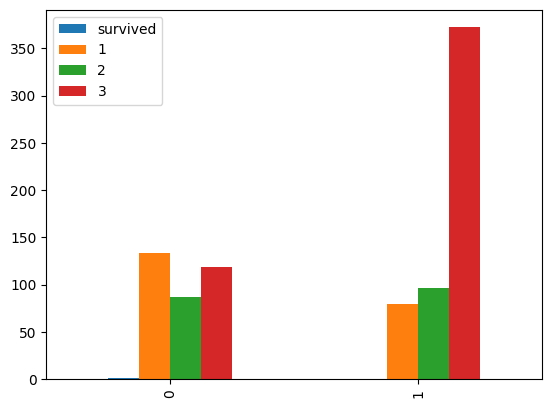

In [26]:
titanic.groupBy("survived").pivot("pclass").count().toPandas().plot(kind="bar")

In [27]:
titanic.groupBy("survived").pivot("who").count().show()

+--------+-----+---+-----+
|survived|child|man|woman|
+--------+-----+---+-----+
|       1|   49| 88|  203|
|       0|   34|449|   66|
+--------+-----+---+-----+



<Axes: >

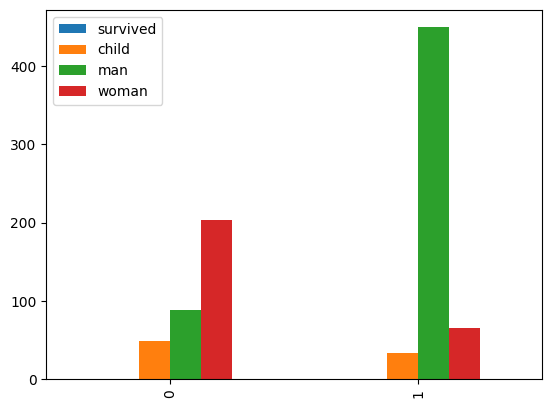

In [28]:
titanic.groupBy("survived").pivot("who").count().toPandas().plot(kind="bar")

In [29]:
titanic.groupBy("survived", "who").pivot("pclass").count().show()

+--------+-----+---+----+---+
|survived|  who|  1|   2|  3|
+--------+-----+---+----+---+
|       0|woman|  2|   6| 58|
|       1|child|  5|  19| 25|
|       0|child|  1|NULL| 33|
|       1|woman| 87|  60| 56|
|       0|  man| 77|  91|281|
|       1|  man| 42|   8| 38|
+--------+-----+---+----+---+



In [30]:
titanic.groupBy("survived", "sex").pivot("pclass").count().toPandas()

,survived,sex,1,2,3
0,1,0,89,70,72
1,0,1,77,91,300
2,0,0,3,6,72
3,1,1,45,17,47


<Axes: ylabel='Frequency'>

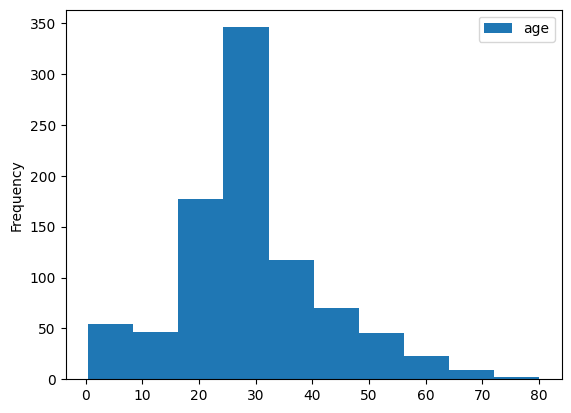

In [31]:
titanic.select("age").toPandas().plot(kind="hist")

## coleration


In [32]:
titanic.show(10)

+---+--------+------+---+----+-----+-----+-------+--------+-----+----------+-----+
| id|survived|pclass|sex| age|sibsp|parch|   fare|embarked|  who|adult_male|alone|
+---+--------+------+---+----+-----+-----+-------+--------+-----+----------+-----+
|  0|       0|     3|  1|22.0|    1|    0|   7.25|       S|  man|      true|false|
|  1|       1|     1|  0|38.0|    1|    0|71.2833|       C|woman|     false|false|
|  2|       1|     3|  0|26.0|    0|    0|  7.925|       S|woman|     false| true|
|  3|       1|     1|  0|35.0|    1|    0|   53.1|       S|woman|     false|false|
|  4|       0|     3|  1|35.0|    0|    0|   8.05|       S|  man|      true| true|
|  5|       0|     3|  1|29.0|    0|    0| 8.4583|       Q|  man|      true| true|
|  6|       0|     1|  1|54.0|    0|    0|51.8625|       S|  man|      true| true|
|  7|       0|     3|  1| 2.0|    3|    1| 21.075|       S|child|     false|false|
|  8|       1|     3|  0|27.0|    0|    2|11.1333|       S|woman|     false|false|
|  9

In [33]:
from pyspark.mllib.stat import Statistics

# select variables to check correlation
df_clr = titanic.select("survived", "pclass", "sex", "age", "fare")

# create RDD table for correlation calculation
rdd_table = df_clr.rdd.map(lambda row: row[0:])

# get the correlation matrix
corr_mat = Statistics.corr(rdd_table, method="pearson")

<Axes: >

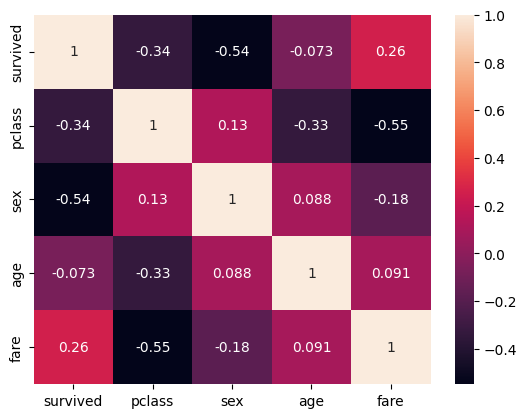

In [34]:
import seaborn as sns

sns.heatmap(
    corr_mat,
    annot=True,
    xticklabels=["survived", "pclass", "sex", "age", "fare"],
    yticklabels=["survived", "pclass", "sex", "age", "fare"],
)

## describe & summary


In [35]:
titanic.describe(["survived", "pclass", "sex", "age", "fare"]).show()

+-------+-------------------+------------------+-------------------+------------------+-----------------+
|summary|           survived|            pclass|                sex|               age|             fare|
+-------+-------------------+------------------+-------------------+------------------+-----------------+
|  count|                889|               889|                889|               889|              889|
|   mean|0.38245219347581555|2.3115860517435323| 0.6490438695163104|29.514251968503935|32.09668087739029|
| stddev|0.48625968831477334|0.8346997785705753|0.47753789445536743|12.970883624121159|49.69750431670795|
|    min|                  0|                 1|                  0|              0.42|              0.0|
|    max|                  1|                 3|                  1|              80.0|         512.3292|
+-------+-------------------+------------------+-------------------+------------------+-----------------+



In [36]:
titanic.describe().show()

+-------+------------------+-------------------+------------------+-------------------+------------------+------------------+-------------------+-----------------+--------+-----+
|summary|                id|           survived|            pclass|                sex|               age|             sibsp|              parch|             fare|embarked|  who|
+-------+------------------+-------------------+------------------+-------------------+------------------+------------------+-------------------+-----------------+--------+-----+
|  count|               889|                889|               889|                889|               889|               889|                889|              889|     889|  889|
|   mean|             445.0|0.38245219347581555|2.3115860517435323| 0.6490438695163104|29.514251968503935|0.5241844769403825|0.38245219347581555|32.09668087739029|    NULL| NULL|
| stddev|256.99817277718313|0.48625968831477334|0.8346997785705753|0.47753789445536743|12.970883624121159

In [37]:
# summary is similar to describe

titanic.summary().show()

+-------+------------------+-------------------+------------------+-------------------+------------------+------------------+-------------------+-----------------+--------+-----+
|summary|                id|           survived|            pclass|                sex|               age|             sibsp|              parch|             fare|embarked|  who|
+-------+------------------+-------------------+------------------+-------------------+------------------+------------------+-------------------+-----------------+--------+-----+
|  count|               889|                889|               889|                889|               889|               889|                889|              889|     889|  889|
|   mean|             445.0|0.38245219347581555|2.3115860517435323| 0.6490438695163104|29.514251968503935|0.5241844769403825|0.38245219347581555|32.09668087739029|    NULL| NULL|
| stddev|256.99817277718313|0.48625968831477334|0.8346997785705753|0.47753789445536743|12.970883624121159

In [38]:
# We can choose specific statistic methods only.

titanic.summary("min", "25%", "50%", "75%", "max").show()

+-------+---+--------+------+---+----+-----+-----+--------+--------+-----+
|summary| id|survived|pclass|sex| age|sibsp|parch|    fare|embarked|  who|
+-------+---+--------+------+---+----+-----+-----+--------+--------+-----+
|    min|  0|       0|     1|  0|0.42|    0|    0|     0.0|       C|child|
|    25%|223|       0|     2|0.0|22.0|    0|    0|  7.8958|    NULL| NULL|
|    50%|445|       0|     3|1.0|29.0|    0|    0| 14.4542|    NULL| NULL|
|    75%|667|       1|     3|1.0|35.0|    1|    0|    31.0|    NULL| NULL|
|    max|890|       1|     3|  1|80.0|    8|    6|512.3292|       S|woman|
+-------+---+--------+------+---+----+-----+-----+--------+--------+-----+



## using function


In [39]:
def func(x):
    return round(x)


titanic = titanic.withColumn("fare", func("fare"))
titanic.show(10)

+---+--------+------+---+----+-----+-----+----+--------+-----+----------+-----+
| id|survived|pclass|sex| age|sibsp|parch|fare|embarked|  who|adult_male|alone|
+---+--------+------+---+----+-----+-----+----+--------+-----+----------+-----+
|  0|       0|     3|  1|22.0|    1|    0| 7.0|       S|  man|      true|false|
|  1|       1|     1|  0|38.0|    1|    0|71.0|       C|woman|     false|false|
|  2|       1|     3|  0|26.0|    0|    0| 8.0|       S|woman|     false| true|
|  3|       1|     1|  0|35.0|    1|    0|53.0|       S|woman|     false|false|
|  4|       0|     3|  1|35.0|    0|    0| 8.0|       S|  man|      true| true|
|  5|       0|     3|  1|29.0|    0|    0| 8.0|       Q|  man|      true| true|
|  6|       0|     1|  1|54.0|    0|    0|52.0|       S|  man|      true| true|
|  7|       0|     3|  1| 2.0|    3|    1|21.0|       S|child|     false|false|
|  8|       1|     3|  0|27.0|    0|    2|11.0|       S|woman|     false|false|
|  9|       1|     2|  0|14.0|    1|    

In [40]:
spark.stop()

# Resources

1. https://spark.apache.org/docs/latest/rdd-programming-guide.html
2. https://spark.apache.org/docs/latest/api/python/getting_started/quickstart_df.html#
3. https://github.com/vkocaman/PySpark_Essentials_March_2019
4. https://github.com/sundarramamurthy/pyspark
5. https://towardsdatascience.com/beginners-guide-to-pyspark-bbe3b553b79f
6. https://www.guru99.com/pyspark-tutorial.html
7. https://towardsdatascience.com/exploratory-data-analysis-eda-with-pyspark-on-databricks-e8d6529626b1
